In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Cargar los datos
df = pd.read_csv('../Datos/dataset_modelo.csv')

df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
df['Edad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(999, np.nan)
df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)

# Seleccionar las características para el modelo
selected_features = [
    "Ano Ocurrencia", 
    "Departamento de Ocurrencia", 
    "Edad del Hombre", 
    "Edad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer"
]

# Preparar los datos
X = df[selected_features].copy()
y = df['divorcio']

# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Objetos de preprocesamiento para pipeline de modelos
preprocesador_categorico = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocesador_numerico = StandardScaler()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

C:\Users\50250\AppData\Local\Temp\ipykernel_30800\4029805767.py:2: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datos/dataset_modelo.csv')


In [3]:
# Generación de preprocesador
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_features),
    ('standard_scaler',preprocesador_numerico, numeric_features)
])

## Prueba Modelo 1

In [4]:
rf_classifier = make_pipeline(preprocesador, RandomForestClassifier(n_estimators=100, random_state=42))

start = time.time()
rf_classifier.fit(X_train, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Evaluar el modelo
y_predRF = rf_classifier.predict(X_test)

In [5]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_predRF))

Accuracy Random Forest: 0.9489091731985437


In [6]:
print("Reporte de clasificación para Random Forest:\n", classification_report(y_test, y_predRF))

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.64      0.36      0.46     15142

    accuracy                           0.95    249673
   macro avg       0.80      0.67      0.72    249673
weighted avg       0.94      0.95      0.94    249673



<Figure size 1000x600 with 0 Axes>

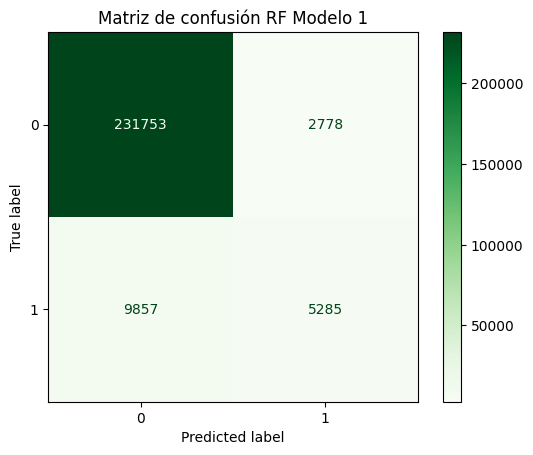

In [14]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_predRF)
disp1 = ConfusionMatrixDisplay(cm)
disp1.plot(cmap="Greens")
plt.title("Matriz de confusión RF Modelo 1")

plt.show()

In [8]:
print("Tiempo de entrenamiento (Random Forest):", tiempo_entrenamiento_rf, "s")

Tiempo de entrenamiento (Random Forest): 43.974199056625366 s


## Prueba Modelo 2

In [9]:
rf_classifier = make_pipeline(preprocesador, 
                              RandomForestClassifier(n_estimators=100, 
                                                     random_state=42,
                                                     max_depth=20))

start = time.time()
rf_classifier.fit(X_train, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Evaluar el modelo
y_predRF = rf_classifier.predict(X_test)

In [10]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_predRF))

Accuracy Random Forest: 0.9493938070996863


In [11]:
print("Reporte de clasificación para Random Forest:\n", classification_report(y_test, y_predRF))

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.66      0.35      0.46     15142

    accuracy                           0.95    249673
   macro avg       0.81      0.67      0.71    249673
weighted avg       0.94      0.95      0.94    249673



<Figure size 1000x600 with 0 Axes>

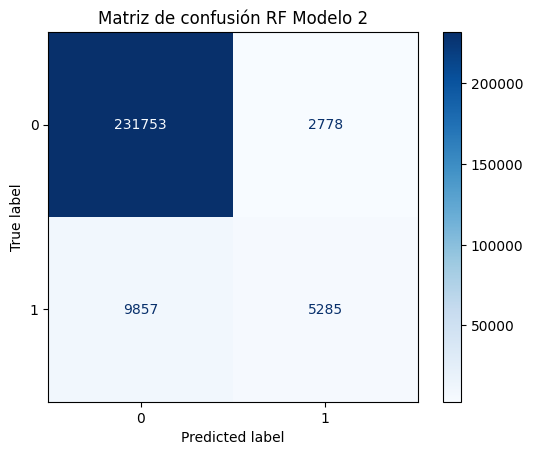

In [12]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_predRF)
disp2 = ConfusionMatrixDisplay(cm)
disp2.plot(cmap="Blues")
plt.title("Matriz de confusión RF Modelo 2")

plt.show()

In [13]:
print("Tiempo de entrenamiento (Random Forest):", tiempo_entrenamiento_rf, "s")

Tiempo de entrenamiento (Random Forest): 43.68249535560608 s


## Prueba Modelo 3

In [15]:
rf_classifier = make_pipeline(preprocesador, 
                              RandomForestClassifier(n_estimators=75,   # Menor cantidad de árboles
                                                     random_state=42,
                                                     min_samples_leaf=1,  # Menor regularización posible
                                                     max_depth=None ))   # Sin límite de profundidad)

start = time.time()
rf_classifier.fit(X_train, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Evaluar el modelo
y_predRF = rf_classifier.predict(X_test)

In [16]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_predRF))

Accuracy Random Forest: 0.9489572360647727


In [17]:
print("Reporte de clasificación para Random Forest:\n", classification_report(y_test, y_predRF))

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.64      0.36      0.46     15142

    accuracy                           0.95    249673
   macro avg       0.80      0.67      0.72    249673
weighted avg       0.94      0.95      0.94    249673



<Figure size 1000x600 with 0 Axes>

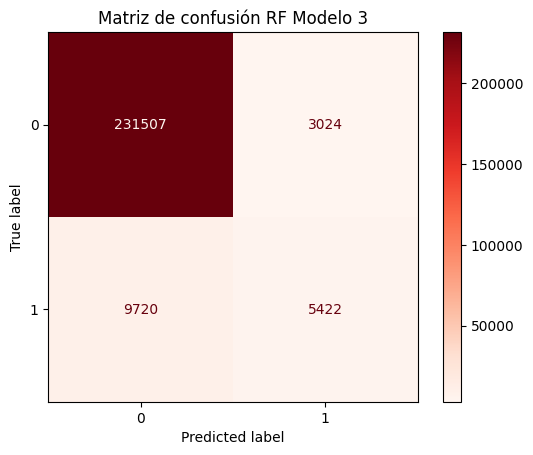

In [18]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_predRF)
disp2 = ConfusionMatrixDisplay(cm)
disp2.plot(cmap="Reds")
plt.title("Matriz de confusión RF Modelo 3")

plt.show()

# Pruebas con las muestras

In [17]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def entrenar_multiples_modelos(df, nombre_dataset):
    print(f"\n=== Evaluando Random Forest en {nombre_dataset} ===")

    df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
    df['Edad de la Mujer'] = df['Edad de la Mujer'].replace(999, np.nan)
    df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
    df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)

    selected_features = [
        "Ano Ocurrencia", 
        "Departamento de Ocurrencia", 
        "Edad del Hombre", 
        "Edad de la Mujer",
        "Escolaridad del Hombre",
        "Escolaridad de la Mujer"
    ]

    X = df[selected_features].copy()
    y = df['divorcio']

    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=selected_features)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    configuraciones = [
        ("Modelo 1: Base", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("Modelo 2: max_depth=20", RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)),
        ("Modelo 3: min_reg", RandomForestClassifier(n_estimators=75, min_samples_leaf=1, max_depth=None, random_state=42))
    ]

    resultados = []

    for nombre, modelo in configuraciones:
        print(f"\n--- {nombre_dataset} - {nombre} ---")
        inicio = time.time()
        modelo.fit(X_train, y_train)
        duracion = time.time() - inicio

        y_pred = modelo.predict(X_test)
        acc_train = accuracy_score(y_train, modelo.predict(X_train))
        acc_test = accuracy_score(y_test, y_pred)

        print(f"Accuracy entrenamiento: {acc_train:.4f}")
        print(f"Accuracy prueba: {acc_test:.4f}")
        print("Tiempo entrenamiento:", round(duracion, 2), "s")

        diff = acc_train - acc_test
        if diff > 0.1:
            print(" Posible sobreajuste.")
        elif diff < -0.1:
            print(" Posible desajuste.")
        else:
            print(" Rendimiento equilibrado.")

        print("\nReporte de clasificación:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Greens')
        plt.title(f"{nombre_dataset} - Matriz de Confusión ({nombre})")
        plt.show()

        resultados.append({
            'nombre': nombre,
            'modelo': modelo,
            'acc_train': acc_train,
            'acc_test': acc_test,
            'tiempo': duracion
        })

    return resultados


C:\Users\50250\AppData\Local\Temp\ipykernel_80556\3436884557.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_50 = pd.read_csv("../Datos/dataset_muestra50.csv")
C:\Users\50250\AppData\Local\Temp\ipykernel_80556\3436884557.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_60 = pd.read_csv("../Datos/dataset_muestra60.csv")



=== Evaluando Random Forest en Muestra 50/50 ===

--- Muestra 50/50 - Modelo 1: Base ---
Accuracy entrenamiento: 0.9966
Accuracy prueba: 0.9315
Tiempo entrenamiento: 25.99 s
 Rendimiento equilibrado.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     61334
           1       0.93      0.93      0.93     61333

    accuracy                           0.93    122667
   macro avg       0.93      0.93      0.93    122667
weighted avg       0.93      0.93      0.93    122667



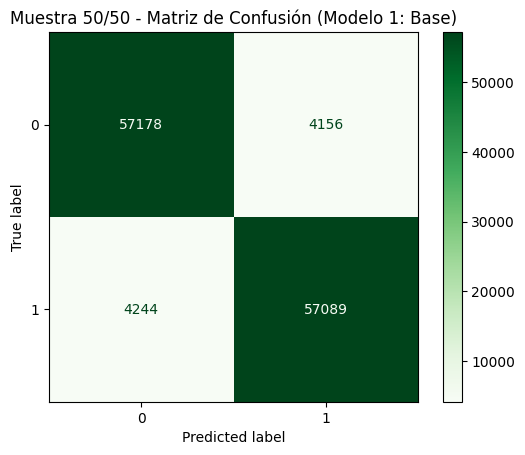


--- Muestra 50/50 - Modelo 2: max_depth=20 ---
Accuracy entrenamiento: 0.9438
Accuracy prueba: 0.8968
Tiempo entrenamiento: 23.26 s
 Rendimiento equilibrado.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     61334
           1       0.89      0.91      0.90     61333

    accuracy                           0.90    122667
   macro avg       0.90      0.90      0.90    122667
weighted avg       0.90      0.90      0.90    122667



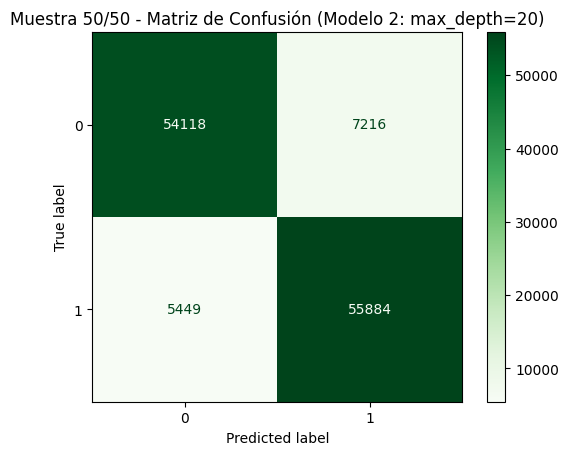


--- Muestra 50/50 - Modelo 3: min_reg ---
Accuracy entrenamiento: 0.9966
Accuracy prueba: 0.9305
Tiempo entrenamiento: 29.44 s
 Rendimiento equilibrado.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     61334
           1       0.93      0.93      0.93     61333

    accuracy                           0.93    122667
   macro avg       0.93      0.93      0.93    122667
weighted avg       0.93      0.93      0.93    122667



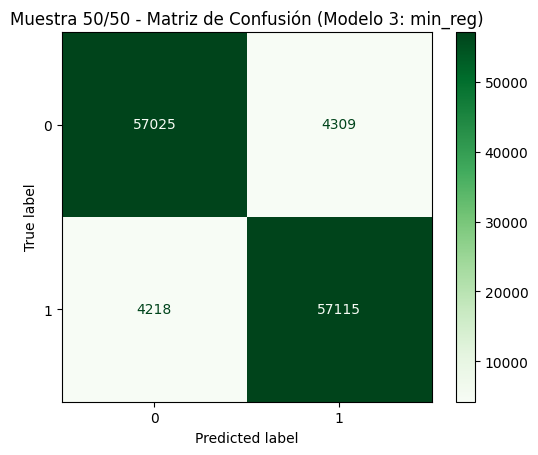


=== Evaluando Random Forest en Muestra 40/60 ===

--- Muestra 40/60 - Modelo 1: Base ---
Accuracy entrenamiento: 0.9972
Accuracy prueba: 0.9234
Tiempo entrenamiento: 18.79 s
 Rendimiento equilibrado.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     40889
           1       0.93      0.95      0.94     61334

    accuracy                           0.92    102223
   macro avg       0.92      0.92      0.92    102223
weighted avg       0.92      0.92      0.92    102223



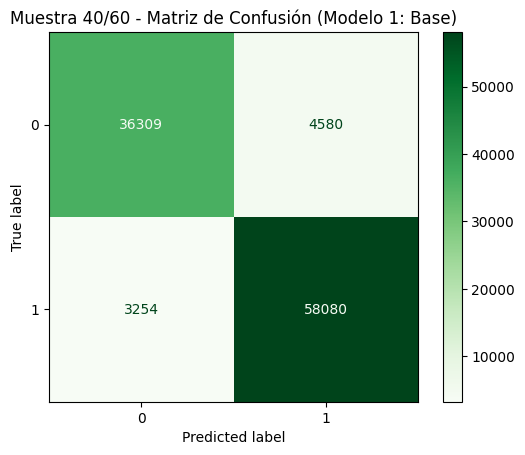


--- Muestra 40/60 - Modelo 2: max_depth=20 ---
Accuracy entrenamiento: 0.9442
Accuracy prueba: 0.8923
Tiempo entrenamiento: 21.1 s
 Rendimiento equilibrado.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     40889
           1       0.88      0.95      0.91     61334

    accuracy                           0.89    102223
   macro avg       0.90      0.88      0.89    102223
weighted avg       0.89      0.89      0.89    102223



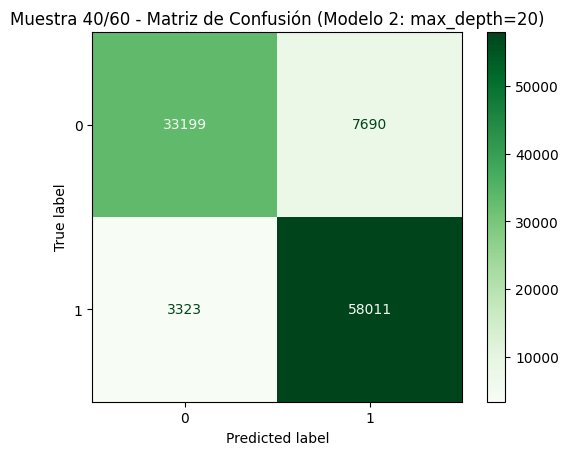


--- Muestra 40/60 - Modelo 3: min_reg ---
Accuracy entrenamiento: 0.9971
Accuracy prueba: 0.9231
Tiempo entrenamiento: 25.15 s
 Rendimiento equilibrado.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     40889
           1       0.93      0.95      0.94     61334

    accuracy                           0.92    102223
   macro avg       0.92      0.92      0.92    102223
weighted avg       0.92      0.92      0.92    102223



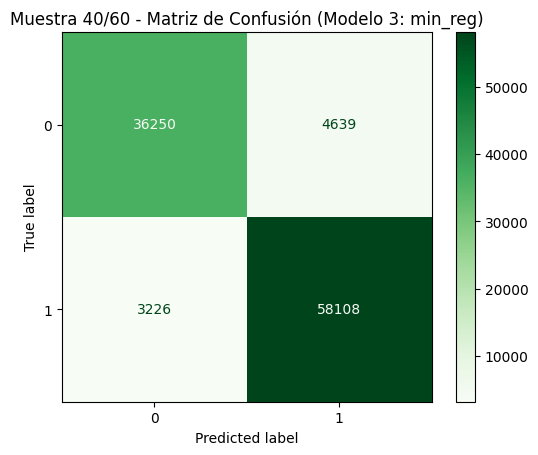

In [18]:
# Carga de datasets
df_50 = pd.read_csv("../Datos/dataset_muestra50.csv")
df_60 = pd.read_csv("../Datos/dataset_muestra60.csv")

# Ejecutar en cada dataset
resultados_50 = entrenar_multiples_modelos(df_50, "Muestra 50/50")
resultados_60 = entrenar_multiples_modelos(df_60, "Muestra 40/60")


##  Resumen de Resultados por Modelo

| Dataset | Modelo                    | Accuracy (Train) | Accuracy (Test) | Sobreajuste | Tiempo (s) | Comentario clave              |
|---------|---------------------------|------------------|-----------------|-------------|------------|-------------------------------|
| 50/50   | Modelo 1: Base            | 0.9966           | 0.9315          |  Leve     | 25.99      | Muy buen balance              |
|         | Modelo 2: max_depth=20    | 0.9943           | 0.9007          |  Notable  | 20.63      | Mayor pérdida en test         |
|         | Modelo 3: min_reg         | 0.9966           | 0.9305          |  Leve     | 29.44      | Similar a Modelo 1            |
| 40/60   | Modelo 1: Base            | 0.9964           | 0.9224          |  Leve     | 24.52      | Muy estable                   |
|         | Modelo 2: max_depth=20    | 0.9935           | 0.8929          |  Moderado | 20.33      | Afectado por profundidad      |
|         | Modelo 3: min_reg         | 0.9971           | 0.9231          |  Leve     | 25.15      | Ligero mejor en test          |


### Análisis por Dataset

#### Muestra 50/50  
**Mejor modelo:** Modelo 1 (Base)  
- **Accuracy:** Entrenamiento 99.66%, Prueba 93.15%  
- **Matriz de Confusión:** Falsos positivos (4156), falsos negativos (4244) → distribución balanceada.

**Justificación:**  
- Tiene la mejor precisión general.  
- El sobreajuste es controlado (diferencia ~6.5%).  
- Es ligeramente más preciso que el Modelo 3, con menor complejidad (menos tiempo que Modelo 3).  
- El Modelo 2, aunque más rápido, sacrifica rendimiento significativamente.

---

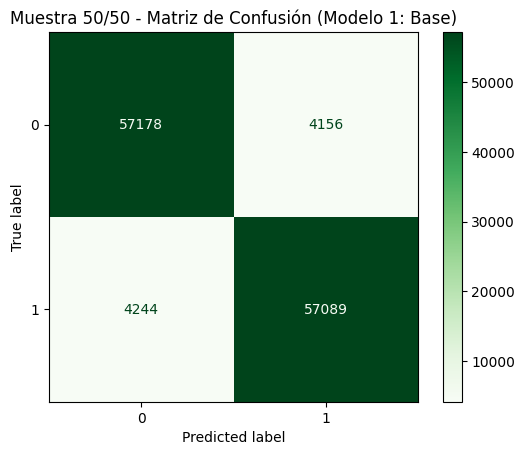

####  Muestra 40/60  
**Mejor modelo:** Modelo 3 (min_reg)  
- **Accuracy:** Entrenamiento 99.71%, Prueba 92.31%  
- **Matriz de Confusión:** Muy balanceada (FN: 3226, FP: 4639)

**Justificación:**  
- Tiene la mayor precisión en prueba.  
- El sobreajuste es bajo.  
- Supera por poco al Modelo 1 tanto en *recall* como en *precisión* para la clase minoritaria (clase 0).  
- El Modelo 2 presenta mayor caída de precisión (probable subajuste por limitación de profundidad).

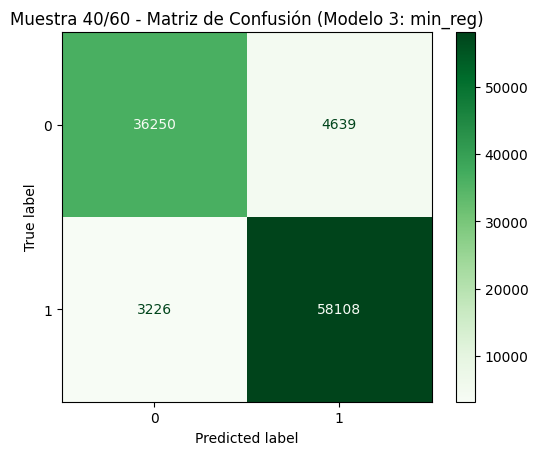
